# Web APIs & NLP - EDA and Preprocessing

## Contents:
- [Imports & Data](#Imports-\&-Data)
- [Initial Data Cleaning](#Initial-Data-Cleaning)
- [EDA - Distribution & Summary Statistics](#EDA-(Exploratory-Data-Analysis))
- [Preprocessing](#Preprocessing)
- [EDA - Most Common Words](#EDA)
- [Final Cleanup](#Final-Cleanup)
- [Save Cleaned & Pre-processed Data](#Save-Cleaned-\&-Pre\-processed-Data)
- [Data Cleaning, EDA, & Preprocessing Summary](#Data-Cleaning,-EDA,-\&-Preprocessing-Summary)

## Imports & Data

#### Libraries

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re # (helpful regex patterns: https://www.geeksforgeeks.org/python-regex-cheat-sheet/)
import emoji # Requires 'pip install emoji' (https://pypi.org/project/emoji/)

# sklearn imports 
from sklearn.feature_extraction.text import CountVectorizer

# Import nltk - natural language toolkit
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

#### Read in Data

In [2]:
# Display long posts in dfs
pd.options.display.max_colwidth = 8600 # allow full display of post

In [3]:
# Review data that was read in
df = pd.read_csv('../data/reddit.csv')
print(df.shape)
df.head()

(8000, 2)


,subreddit,selftext
0,audiophile,"Hey everyone,\n\nMy late father was a DJ in socal throughout the 70s-90s and was obviously pretty big into music. He had a pair of RSL speakers that he never told me the name of before he passed. Are there any audiophiles that has some knowledge on vintage RSL speakers???\n\n\nAlso, i spliced some RCA cables to see if they even worked, and they did, but they are extremely quiet even with everything on full and running it through my 48v mixer. (it almost sounds like it is just the tweeter). Does anyone know if im missing something?\n\nAny help would be greatly appreciated. :)\n\nHere are some photos of the speakers:\nhttps://imgur.com/a/oAhF08F"
1,audiophile,I recently bought a Dual Kicker Comp R 12” sub and Audiocontrol LC-1.800 amp and I think they sound good but I have been having a problem since install where it will randomly make a constant windy air sound usually when I get in my car and it persists for about 2-3 minutes even when no music is playing. It will also do it as I’m driving every now and then. I took it in to where I had it installed and the guy disabled the ANC in my car because he thought my subs were picking up on it but that didn’t fix the problem. Would anyone have any idea why this is happening?
2,audiophile,Hi I'm a beginner to this space and I just wanted some help regarding what's the best piece of headphones/earphones for trying to fall asleep to some brown noise?
3,audiophile,"I'm currently looking for a new power amp, and would love to get a more efficient class D option, but can't afford the range-topping class D amps. \n\nI see pro-ject, the German brand seem to mainly make class D amplifiers (aside from their turntables), however, there isn't much information on how they perform! \n\nAnyone experienced the Amp box DS2 stereo power amp, or any of their other amplifiers? Retails for £599 in the UK. \n\nHow do they hold up compared to class A/B competitors at similar prices like the Emotiva BasX series?"
4,audiophile,i was wondering which is the best option for over-ear headphones under 200€ (wireless if possible) because reading articles only creates confusion: a lot of them are clearly paid by the companies and some of them are just dumb (one i read put a 400$ headphone in first place and a 40$ headphone in second).\nI mostly listen to metal and really live being able to tell the instruments apart; especially the bass which gets almost removed in mixing


#### Map Targe to Binary
- Map the subreddit feature to binary for classification modeling

In [4]:
# Map subreddit to binary
# 0 = 'r/audiophile'
# 1 = 'r/guitar'
df['subreddit'] = df['subreddit'].map({'audiophile': 0, 'guitar': 1})
df.head()

,subreddit,selftext
0,0,"Hey everyone,\n\nMy late father was a DJ in socal throughout the 70s-90s and was obviously pretty big into music. He had a pair of RSL speakers that he never told me the name of before he passed. Are there any audiophiles that has some knowledge on vintage RSL speakers???\n\n\nAlso, i spliced some RCA cables to see if they even worked, and they did, but they are extremely quiet even with everything on full and running it through my 48v mixer. (it almost sounds like it is just the tweeter). Does anyone know if im missing something?\n\nAny help would be greatly appreciated. :)\n\nHere are some photos of the speakers:\nhttps://imgur.com/a/oAhF08F"
1,0,I recently bought a Dual Kicker Comp R 12” sub and Audiocontrol LC-1.800 amp and I think they sound good but I have been having a problem since install where it will randomly make a constant windy air sound usually when I get in my car and it persists for about 2-3 minutes even when no music is playing. It will also do it as I’m driving every now and then. I took it in to where I had it installed and the guy disabled the ANC in my car because he thought my subs were picking up on it but that didn’t fix the problem. Would anyone have any idea why this is happening?
2,0,Hi I'm a beginner to this space and I just wanted some help regarding what's the best piece of headphones/earphones for trying to fall asleep to some brown noise?
3,0,"I'm currently looking for a new power amp, and would love to get a more efficient class D option, but can't afford the range-topping class D amps. \n\nI see pro-ject, the German brand seem to mainly make class D amplifiers (aside from their turntables), however, there isn't much information on how they perform! \n\nAnyone experienced the Amp box DS2 stereo power amp, or any of their other amplifiers? Retails for £599 in the UK. \n\nHow do they hold up compared to class A/B competitors at similar prices like the Emotiva BasX series?"
4,0,i was wondering which is the best option for over-ear headphones under 200€ (wireless if possible) because reading articles only creates confusion: a lot of them are clearly paid by the companies and some of them are just dumb (one i read put a 400$ headphone in first place and a 40$ headphone in second).\nI mostly listen to metal and really live being able to tell the instruments apart; especially the bass which gets almost removed in mixing


## Initial Data Cleaning
- Data cleaning was broken down into several functions that made it easier to apply to a df by using .apply() rather than looping through the entire df.
- The text data is cleaned as follows:
    - urls are removed
    - Brackets and parenthesis are removed
    - New line characters are replaced with a space
    - Reddit-specific oddities are replaced with a space
    - Emojis are converted to words
    - Numbers are removed
    - Punctuations are removed
    - All extra white space is removed

In [5]:
# Function for cleaning text (posts from Reddit)
def clean_text(text):
    """This function processes text through a series of steps to clean in. Those steps are:
        - urls are removed
        - Brackets and parenthesis are removed
        - New line characters are replaced with a space
        - Reddit-specific oddities are replaced with a space
        - Emojis are converted to words
        - Numbers are removed
        - Punctuations are removed
        - All extra white space is removed
    
    Parameters:
        text (str): raw text data
    
    Returns:
        text (str): cleaned text data
    """
    # Remove urls
    text = re.sub(r'http\S+', '', text) # https://stackoverflow.com/a/40823105
    
    # Remove remaining brackets & parenthesis
    text = re.sub(r"[\([{})\]]", "", text) # https://www.geeksforgeeks.org/how-to-remove-brackets-from-text-file-in-python/
    
    # replace '\n' (new line) with space
    text = text.replace('\n', ' ')
    
    # remove weird symbols: '&amp;' '#x200B;' '-&gt;'
    text = text.replace('&amp;', ' ')
    text = text.replace('#x200B;', ' ') # https://www.reddit.com/r/NoStupidQuestions/comments/99q2e2/what_is_x200b/
    text = text.replace('&gt;', ' ')
    
    # Convert Emojis to text (https://medium.com/analytics-vidhya/how-to-print-emojis-using-python-2e4f93443f7e)
    text = emoji.demojize(text)
    
    # remove numbers (https://stackoverflow.com/a/57030875)
    text = re.sub(r'\d+', '', text)
    
    # Remove Punctuations (https://www.geeksforgeeks.org/python-remove-punctuation-from-string/)
    text = re.sub(r'[^\w\s]', '', text)
    
    # remove extra white space
    text = " ".join(text.split()) # https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return text

In [6]:
# Clean Text
df_self_text = df['selftext']
cleaned_posts = df_self_text.apply(lambda x: clean_text(x))
# cleaned_posts[723]

In [7]:
# Add new column to df
df['cleaned_selftext'] = cleaned_posts

## EDA (Exploratory Data Analysis)
### Round 1 - Distribution & Summary Statistics
- This initial round of EDA is performed on cleaned data to review distribution as well as common words
- This is before any pre-processing (i.e. stopword removal, stemming, lemmatizing) has been done. A second round of EDA is performed after preprocessing to look at most common and shared words between corpora.

In [8]:
# Set sns colors for visualizations
color_palette = 'husl'
sns.set_palette(color_palette, 8)
default_colors = sns.color_palette(color_palette, 8)

### Post Length Distribution
- Visualize the distribution of the post lengths by words and by characters.

In [9]:
# Calculate the length of each post
df['post_length'] = df['selftext'].str.len()

In [10]:
# Calculate the post word count
df['post_word_count'] = df['selftext'].str.split().str.len()

<Figure size 800x800 with 0 Axes>

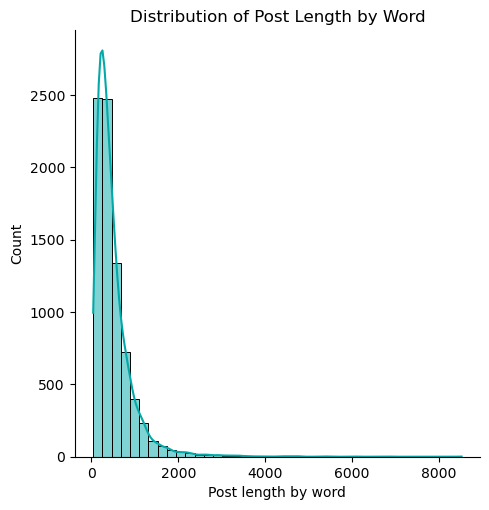

In [58]:
# Distribution of all post lengths (by characters)
plt.figure(figsize=(8, 8));
sns.displot(df['post_length'], bins=40, kde=True, color='#03a8a8');
plt.xlabel('Post length by word');
plt.title('Distribution of Post Length by Word');

<Figure size 800x800 with 0 Axes>

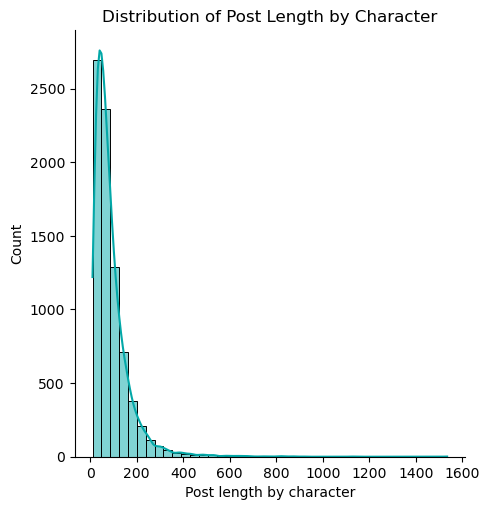

In [59]:
# Distribution of the word counts of all post lengths
plt.figure(figsize=(8, 8));
sns.displot(df['post_word_count'], bins=40, kde=True, color='#03a8a8');
plt.xlabel('Post length by character');
plt.title('Distribution of Post Length by Character');

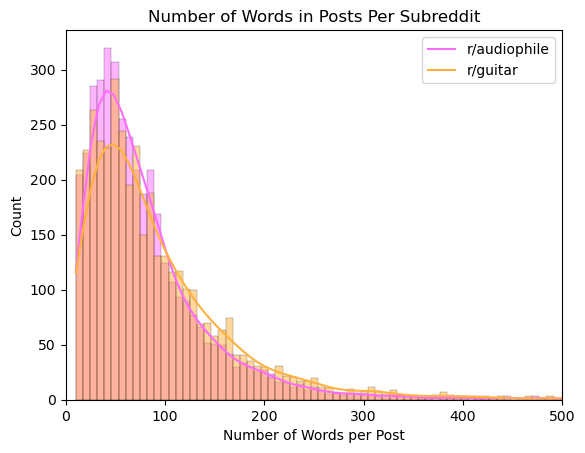

In [13]:
# Plot the distribution of the word counts by subreddit
# Note: the x-axis is limited for better visualization
sns.histplot(data=df, x="post_word_count", kde=True, hue="subreddit", palette=['#ffb13d','#ff6bff'])
plt.title('Number of Words in Posts Per Subreddit')
plt.xlabel('Number of Words per Post');
plt.legend(['r/audiophile', 'r/guitar'])
plt.xlim(0,500);

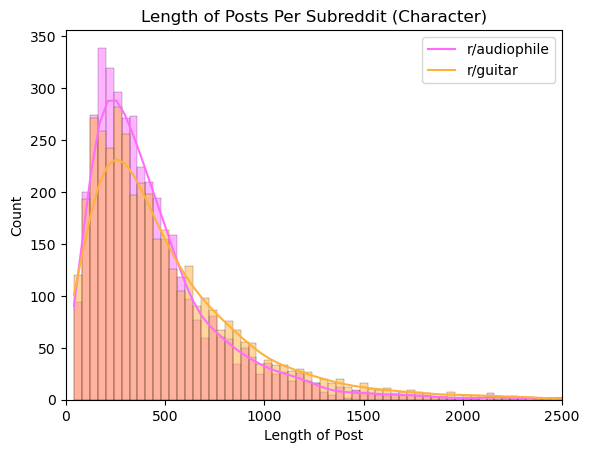

In [14]:
# Plot the distribution of the word counts by subreddit
# Note: the x-axis is limited for better visualization
sns.histplot(data=df, x="post_length", kde=True, hue="subreddit", palette=['#ffb13d','#ff6bff'])
plt.title('Length of Posts Per Subreddit (Character)')
plt.xlabel('Length of Post');
plt.legend(['r/audiophile', 'r/guitar'])
plt.xlim(0,2500);

In [15]:
# Calculate overall descriptive statistics
df.describe()

,subreddit,post_length,post_word_count
count,8000.000000,8000.000000,8000.000000
mean,0.500000,497.711000,88.915375
std,0.500031,472.383776,81.999312
min,0.000000,41.000000,10.000000
25%,0.000000,218.000000,39.000000
50%,0.500000,370.000000,67.000000
75%,1.000000,618.000000,111.000000
max,1.000000,8517.000000,1534.000000


In [16]:
# Calculate 'audiophile' descriptive statistics
df.loc[df['subreddit'] == 1].describe()

,subreddit,post_length,post_word_count
count,4000.0,4000.000000,4000.000000
mean,1.0,452.378000,82.093500
std,0.0,377.026921,68.969638
min,1.0,42.000000,10.000000
25%,1.0,211.000000,38.000000
50%,1.0,351.000000,64.000000
75%,1.0,556.000000,102.000000
max,1.0,4385.000000,834.000000


In [17]:
# Calculate 'guitar' descriptive statistics
df.loc[df['subreddit'] == 0].describe()

,subreddit,post_length,post_word_count
count,4000.0,4000.000000,4000.000000
mean,0.0,543.044000,95.737250
std,0.0,547.803045,92.733735
min,0.0,41.000000,10.000000
25%,0.0,227.000000,40.000000
50%,0.0,393.000000,71.000000
75%,0.0,681.000000,121.000000
max,0.0,8517.000000,1534.000000


In [18]:
# Display longest post
longest_post = df.loc[df['post_word_count'] == df['post_word_count'].max()]['selftext'].to_string()
# print(f"Longest Post:\n{longest_post}")  # Uncomment to view longest post

### Post Length Distribution Analysis
- Looking at both the post lengths by words and lengths, it is clear that the data is heavily right skewed.
- The overall mean of the post lengths by word is about 89 words with a standard deviation of about 82 words and a median of 67 words. The max post length is a whopping 1534 words and it is a review of a bluetooth audio receiver.
- Because this model is focused on NLP, the outliers in terms of post length should not be removed because they contain valuable information.
- Posts in the 'audiophile' average out to be about 82 words with most posts below 220 words (2 standard deviations). Because this is so heavily skewed, the median of 64 words is likely closer to what the typical post length would be.
- Posts in the 'guitar' average out to be about 96 words with most posts below 282 words (2 standard deviations). Similar to the 'audiophile' subreddit because this is so heavily skewed, the median of 71 words is likely closer to what the typical post length would be.
- This, along with visualizing each corpus' distributions, demonstrates that redditors in the 'guitar' subreddit are typically a bit more verbose with their posts as compared to their counterparts in the 'audiophiles' subreddit.

## Preprocessing

### Stoppin', Stemmin', and Lemmin'
(but really, Stopwords, Stemming, and Lemmatizing)

- Text data is preprocessed through several different methods to test performance.
- Each process is concatenated to the df in order to reference separate methods of processing later on.
- First, English stopwords are removed. Stopwords are a set of commonly used words, so they are removed because they do not add any additional information to the model.
- Second the corpus is stemmed or lemmatized. Because stemming and lemmatizing accomplish similar goals, just in different ways, these processes happen separately and are saved to the df in separate columns. Then either stemmed or lemmatized text data can be referenced later on.

In [19]:
# Tokenize Text (from lesson 504)
def tokenize_text(text):
    """This function tokenizes text data. This means that a string is split into "tokens" that are returned in a list.
    
    Parameters:
        text (str): Raw text data.
    
    Returns:
        tokens (list): Tokenized text data in the form of a list.
    """
    # Instantiate Tokenizer
    # \w = Any "word" character = letters, numbers
    # + = There are one or more such characters in a row
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

In [20]:
# Stopwords
# Removes stopwords or a list of words from a list of strings
# words_to_remove
#  - 'english' - remove english stopwords. Can remove other built-in lists of stopwords as well
#  - list of words - removes anything contained in the specified list of words
def remove_stopwords(text, words_to_remove='english'):
    """This function removed stopwords a string of text.
    The stopwords can either be English (or another language) stopwords from nltk's built-in library,
    or it can be a custom list of stopwords input by the user.
    
    Parameters:
        text (str): raw text data
        words_to_remove, optional (str/list):
            - If a string is input, it must be a reference to NLTK's built-in stopword library (i.e. 'english').
            - If a list of strings is input, then the function will remove this custom list of stopwords from the string.
            - If nothing is input, English stopwords will be removed.
    
    Returns:
        text (str): Processed text data with stopwords removed.
    """
    # Tokenize text
    tokens = tokenize_text(text)
    
    if type(words_to_remove) == list:
        # Remove list of words
        stop_tokens = [token for token in tokens if token not in words_to_remove]
    elif type(words_to_remove) == str:
        # Remove stopwords
        stop_tokens = [token for token in tokens if token not in stopwords.words(words_to_remove)]
        
    # Join list to recreate string
    text = " ".join(stop_tokens)
    return text

In [21]:
# Stem Text
def stem_text(text):
    """This function stems text data.
    
    Parameters:
        text (str): Raw text data.
    
    Returns:
        text (str): Stemmed text data.
    """
    # Tokenize text
    tokens = tokenize_text(text)
    
    # Stem tokens
    ps = PorterStemmer()
    stem_tokens = [ps.stem(token) for token in tokens]
    
    # Join list to recreate string
    text = " ".join(stem_tokens)
    return text

In [22]:
# Lemmatize Text
def lemmatize_text(text):
    """This function lemmatizes text data.
    
    Parameters:
        text (str): Raw text data.
    
    Returns:
        text (str): Lemmatized text data.
    """
    # Tokenize text
    tokens = tokenize_text(text)
    
    # Lemmatize tokens
    wn = WordNetLemmatizer()
    lem_tokens = [wn.lemmatize(token) for token in tokens]
    
    # Join list to recreate string
    text = " ".join(lem_tokens)
    return text

In [23]:
# Calculate the most common words of 2 dfs and wrap into a new df
def most_common_words(df0, df1, n_words=20):
    """This function returns the most common words of two pre-vectorized text data frames.
    
    Parameters:
        df0 (pd.DataFrame): First vectorized text dataframe.
        df1 (pd.DataFrame): Second vectorized text dataframe.
        n_words (int): Number of common words to return (defualt=20).
    
    Returns:
        (pd.DataFrame): 'n_words' number of the most common words for both corpora.
            - columns: [df0 words, df0 word count, df1 words, df1 word count]
    """
    most_common_words = {
        'r/audiophile': df0.sum().sort_values(ascending = False)[0:n_words].index,
        'count (aud)': df0.sum().sort_values(ascending = False)[0:n_words].values,
        'r/guitar': df1.sum().sort_values(ascending = False)[0:n_words].index,
        'count (gui)': df1.sum().sort_values(ascending = False)[0:n_words].values
    }
    return pd.DataFrame(most_common_words, index=range(0,n_words))

In [24]:
# Function for determining which words are shared between 2 lists
def shared_str(list0, list1):
    """This function returns owrds that are shared between two input lists.
    
    Parameters:
        list0 (list(str)): First list of words to be compared.
        list1 (list(str)): Second list of words to be compared.
    
    Returns:
        list(str): List of words shared between the two input lists
    """
    return [str0 for str0 in list0 if str0 in [str1 for str1 in list1]]

**Process text data and concatenate to data frame.**

In [25]:
# Remove Stopwords - NOTE: This cell may take several minutes to run
df['no_stop_selftext'] = df['cleaned_selftext'].apply(lambda x: remove_stopwords(x))

In [26]:
# Stem Text - Stem the corpus with stopwords removed
df['stem_selftext'] = df['no_stop_selftext'].apply(lambda x: stem_text(x))

In [27]:
# Lemmatize Text - Lemmatize the corpus with stopwords removed
df['lemmatize_selftext'] = df['no_stop_selftext'].apply(lambda x: lemmatize_text(x))

**Review samples of processed text.**

In [28]:
# Examine a sample of cleaned text
df['cleaned_selftext'][0]

'Hey everyone My late father was a DJ in socal throughout the ss and was obviously pretty big into music He had a pair of RSL speakers that he never told me the name of before he passed Are there any audiophiles that has some knowledge on vintage RSL speakers Also i spliced some RCA cables to see if they even worked and they did but they are extremely quiet even with everything on full and running it through my v mixer it almost sounds like it is just the tweeter Does anyone know if im missing something Any help would be greatly appreciated Here are some photos of the speakers'

In [29]:
# Examine a sample of stemmed text
df['stem_selftext'][0]

'hey everyon my late father dj socal throughout ss obvious pretti big music he pair rsl speaker never told name pass are audiophil knowledg vintag rsl speaker also splice rca cabl see even work extrem quiet even everyth full run v mixer almost sound like tweeter doe anyon know im miss someth ani help would greatli appreci here photo speaker'

In [30]:
# Examine a sample of lemmatized text
df['lemmatize_selftext'][0]

'Hey everyone My late father DJ socal throughout s obviously pretty big music He pair RSL speaker never told name passed Are audiophiles knowledge vintage RSL speaker Also spliced RCA cable see even worked extremely quiet even everything full running v mixer almost sound like tweeter Does anyone know im missing something Any help would greatly appreciated Here photo speaker'

## EDA
### Round 2 - Most Common Words
- The most common words, bigrams, and trigrams of each subreddit are analyzed.
- Of these most common words, ones that are shared between corpora are removed.

#### Single Words
- Visualize the most common single words for each corpus and save them to a list.

In [60]:
# Create status vector column to be vectorized
df_post0 = df.loc[df['subreddit'] == 0]['no_stop_selftext']
df_post1 = df.loc[df['subreddit'] == 1]['no_stop_selftext']

In [61]:
# Instantiate CountVecotrizer
cvec = CountVectorizer(ngram_range=(1,1))

In [62]:
# For r/audiophile
# Fit cvec
df_post_fit0 = cvec.fit_transform(df_post0)
# Convert to df
df_post_fit0 = pd.DataFrame(df_post_fit0.todense(),
                           columns=cvec.get_feature_names_out())

# For r/guitar
# Fit cvec
df_post_fit1 = cvec.fit_transform(df_post1)
# Convert to df
df_post_fit1 = pd.DataFrame(df_post_fit1.todense(),
                           columns=cvec.get_feature_names_out())

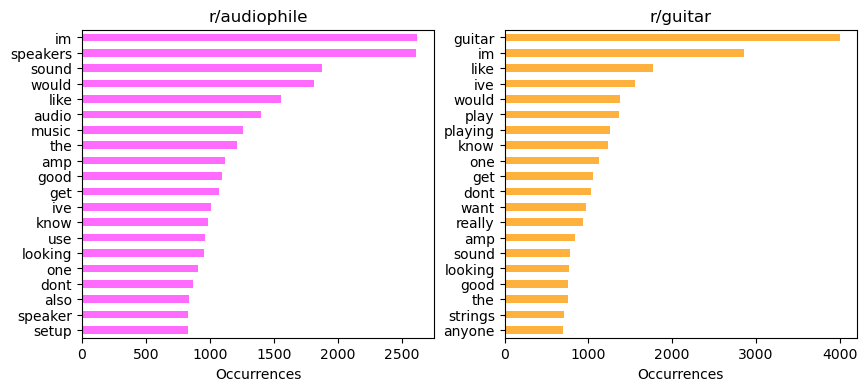

In [63]:
# 20 most common single words
# plot functionality modified from: https://stackoverflow.com/a/37799021
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(axs[0])
plt.title('r/audiophile')
plt.xlabel('Occurences')
df_post_fit0.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ff6bff')
plt.xlabel('Occurrences');

plt.sca(axs[1])
plt.title('r/guitar')
plt.xlabel('Occurences')
df_post_fit1.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ffb13d')
plt.xlabel('Occurrences');

In [35]:
# Calculate the top 50 bigrams
df_common_words = most_common_words(df_post_fit0, df_post_fit1, n_words=50)

In [36]:
# Determine which of the top 50 bigrams are shared between datasets
shared_words = shared_str(df_common_words['r/guitar'], df_common_words['r/audiophile'])
np.array(shared_words) # View which words were shared from both datasets top 50 most common words

array(['im', 'like', 'ive', 'would', 'know', 'one', 'get', 'dont', 'want',
       'really', 'amp', 'sound', 'looking', 'good', 'the', 'anyone',
       'also', 'new', 'thanks', 'time', 'something', 'could', 'use',
       'much', 'got', 'help', 'so', 'need', 'way', 'music', 'is',
       'better'], dtype='<U9')

#### Bigrams
- Visualize the most common bigrams for each corpus and save them to a list.

In [64]:
# Instantiate CountVecotrizer
cvec = CountVectorizer(ngram_range=(2,2))

In [65]:
# For r/audiophile
# Fit cvec
df_post_fit0 = cvec.fit_transform(df_post0)
# Convert to df
df_post_fit0 = pd.DataFrame(df_post_fit0.todense(),
                           columns=cvec.get_feature_names_out())

# For r/guitar
# Fit cvec
df_post_fit1 = cvec.fit_transform(df_post1)
# Convert to df
df_post_fit1 = pd.DataFrame(df_post_fit1.todense(),
                           columns=cvec.get_feature_names_out())

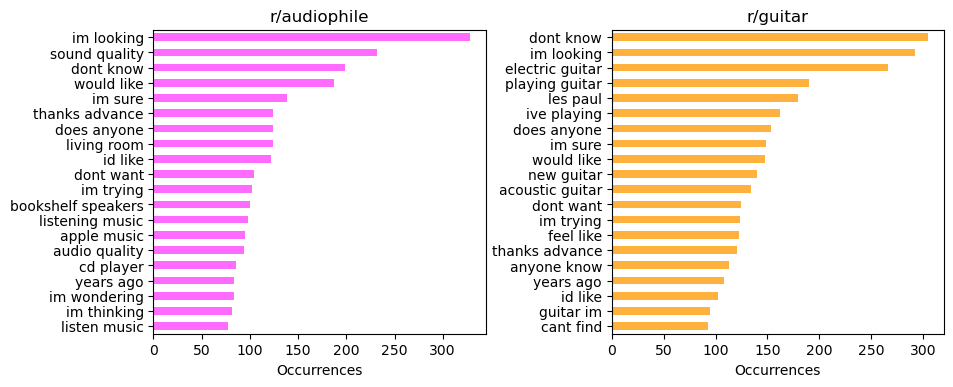

In [66]:
# 20 most common bigrams
# plot functionality modified from: https://stackoverflow.com/a/37799021
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(pad=6.0)
plt.sca(axs[0])
plt.title('r/audiophile')
plt.xlabel('Occurences')
df_post_fit0.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ff6bff')
plt.xlabel('Occurrences');

plt.sca(axs[1])
plt.title('r/guitar')
plt.xlabel('Occurences')
df_post_fit1.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ffb13d')
plt.xlabel('Occurrences');

In [67]:
# Calculate the top 50 bigrams
df_common_bi = most_common_words(df_post_fit0, df_post_fit1, n_words=50)

In [68]:
# Determine which of the top 50 bigrams are shared between datasets
shared_bi = shared_str(df_common_bi['r/guitar'], df_common_bi['r/audiophile'])
np.array(shared_bi) # View which bigrams were shared from both datasets top 50 most common words

array(['dont know', 'im looking', 'does anyone', 'im sure', 'would like',
       'dont want', 'im trying', 'feel like', 'thanks advance',
       'anyone know', 'years ago', 'id like', 'cant find', 'im wondering',
       'any help', 'im thinking', 'so im', 'would love', 'seems like',
       'hey guys', 'im new', 'audio interface'], dtype='<U15')

#### Trigrams
- Visualize the most common trigrams for each corpus and save them to a list.

In [69]:
# Instantiate CountVecotrizer
cvec = CountVectorizer(ngram_range=(3,3))

In [70]:
# For r/audiophile
# Fit cvec
df_post_fit0 = cvec.fit_transform(df_post0)
# Convert to df
df_post_fit0 = pd.DataFrame(df_post_fit0.todense(),
                           columns=cvec.get_feature_names_out())

# For r/guitar
# Fit cvec
df_post_fit1 = cvec.fit_transform(df_post1)
# Convert to df
df_post_fit1 = pd.DataFrame(df_post_fit1.todense(),
                           columns=cvec.get_feature_names_out())

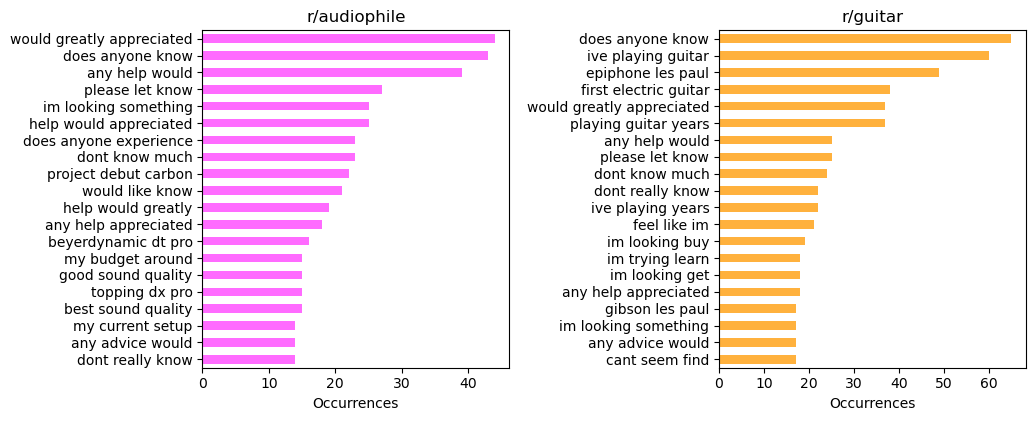

In [71]:
# View 20 most common trigrams
# plot functionality modified from: https://stackoverflow.com/a/37799021
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
fig.tight_layout(pad=12.0)
plt.sca(axs[0])
plt.title('r/audiophile')
plt.xlabel('Occurences')
df_post_fit0.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ff6bff')
plt.xlabel('Occurrences');

plt.sca(axs[1])
plt.title('r/guitar')
plt.xlabel('Occurences')
df_post_fit1.sum().sort_values(ascending = True).tail(20).plot(kind = 'barh', color='#ffb13d')
plt.xlabel('Occurrences');

In [45]:
# Calculate the top 50 trigrams
df_common_tri = most_common_words(df_post_fit0, df_post_fit1, n_words=50)

In [46]:
# Determine which of the top 50 trigrams are shared between datasets
shared_tri = shared_str(df_common_tri['r/guitar'], df_common_tri['r/audiophile'])
np.array(shared_tri) # View which trigrams were shared from both datasets top 50 most common words

array(['does anyone know', 'would greatly appreciated', 'any help would',
       'please let know', 'dont know much', 'dont really know',
       'im looking buy', 'any help appreciated', 'im looking get',
       'im looking something', 'any advice would', 'cant seem find',
       'help would appreciated', 'im pretty sure', 'im trying get',
       'would like know', 'would much appreciated', 'would love hear'],
      dtype='<U25')

### Most Common Words Analysis
- Many commonly used words are relatively neutral (is, im, could, much, way, etc.)
- However, there are also some more likely corpus specific words that arise in this analysis (music, sound, amp, audio, etc.)
- These words appear to be very specific for certain contexts, however they are shared between both corpora. This is most likely due to these two subreddits being of a similar topic.
- A critical aim of this proof-of-concept model is to be able to differentiate between two subreddits even though they are related in topic, meaning that they share many topic-specific words.

## Final Cleanup
- Prune words, bigrams, and trigrams that are shared between the top 50 (words, bigrams, trigrams) of each dataset.

In [47]:
# Combine most common words, bigrams, and trigrams
shared_words_to_remove = shared_tri + shared_bi + shared_words
np.array(shared_words_to_remove) # View top shared words, bigrams, & trigrams

array(['does anyone know', 'would greatly appreciated', 'any help would',
       'please let know', 'dont know much', 'dont really know',
       'im looking buy', 'any help appreciated', 'im looking get',
       'im looking something', 'any advice would', 'cant seem find',
       'help would appreciated', 'im pretty sure', 'im trying get',
       'would like know', 'would much appreciated', 'would love hear',
       'dont know', 'im looking', 'does anyone', 'im sure', 'would like',
       'dont want', 'im trying', 'feel like', 'thanks advance',
       'anyone know', 'years ago', 'id like', 'cant find', 'im wondering',
       'any help', 'im thinking', 'so im', 'would love', 'seems like',
       'hey guys', 'im new', 'audio interface', 'im', 'like', 'ive',
       'would', 'know', 'one', 'get', 'dont', 'want', 'really', 'amp',
       'sound', 'looking', 'good', 'the', 'anyone', 'also', 'new',
       'thanks', 'time', 'something', 'could', 'use', 'much', 'got',
       'help', 'so', 'need'

In [48]:
# Remove Additional "shared stopwords"
df['no_shared_stem_selftext'] = df['no_stop_selftext'].apply(lambda x: remove_stopwords(x, words_to_remove=shared_words_to_remove))

# Stem Text - Stem the corpus with stopwords removed
df['no_shared_stem_selftext'] = df['no_shared_stem_selftext'].apply(lambda x: stem_text(x))

In [49]:
# Review final df
print(df.shape)
df.head(3)

(8000, 9)


,subreddit,selftext,cleaned_selftext,post_length,post_word_count,no_stop_selftext,stem_selftext,lemmatize_selftext,no_shared_stem_selftext
0,0,"Hey everyone,\n\nMy late father was a DJ in socal throughout the 70s-90s and was obviously pretty big into music. He had a pair of RSL speakers that he never told me the name of before he passed. Are there any audiophiles that has some knowledge on vintage RSL speakers???\n\n\nAlso, i spliced some RCA cables to see if they even worked, and they did, but they are extremely quiet even with everything on full and running it through my 48v mixer. (it almost sounds like it is just the tweeter). Does anyone know if im missing something?\n\nAny help would be greatly appreciated. :)\n\nHere are some photos of the speakers:\nhttps://imgur.com/a/oAhF08F",Hey everyone My late father was a DJ in socal throughout the ss and was obviously pretty big into music He had a pair of RSL speakers that he never told me the name of before he passed Are there any audiophiles that has some knowledge on vintage RSL speakers Also i spliced some RCA cables to see if they even worked and they did but they are extremely quiet even with everything on full and running it through my v mixer it almost sounds like it is just the tweeter Does anyone know if im missing something Any help would be greatly appreciated Here are some photos of the speakers,641,113,Hey everyone My late father DJ socal throughout ss obviously pretty big music He pair RSL speakers never told name passed Are audiophiles knowledge vintage RSL speakers Also spliced RCA cables see even worked extremely quiet even everything full running v mixer almost sounds like tweeter Does anyone know im missing something Any help would greatly appreciated Here photos speakers,hey everyon my late father dj socal throughout ss obvious pretti big music he pair rsl speaker never told name pass are audiophil knowledg vintag rsl speaker also splice rca cabl see even work extrem quiet even everyth full run v mixer almost sound like tweeter doe anyon know im miss someth ani help would greatli appreci here photo speaker,Hey everyone My late father DJ socal throughout s obviously pretty big music He pair RSL speaker never told name passed Are audiophiles knowledge vintage RSL speaker Also spliced RCA cable see even worked extremely quiet even everything full running v mixer almost sound like tweeter Does anyone know im missing something Any help would greatly appreciated Here photo speaker,hey everyon my late father dj socal throughout ss obvious pretti big he pair rsl speaker never told name pass are audiophil knowledg vintag rsl speaker also splice rca cabl see even work extrem quiet even everyth full run v mixer almost sound tweeter doe miss ani greatli appreci here photo speaker
1,0,I recently bought a Dual Kicker Comp R 12” sub and Audiocontrol LC-1.800 amp and I think they sound good but I have been having a problem since install where it will randomly make a constant windy air sound usually when I get in my car and it persists for about 2-3 minutes even when no music is playing. It will also do it as I’m driving every now and then. I took it in to where I had it installed and the guy disabled the ANC in my car because he thought my subs were picking up on it but that didn’t fix the problem. Would anyone have any idea why this is happening?,I recently bought a Dual Kicker Comp R sub and Audiocontrol LC amp and I think they sound good but I have been having a problem since install where it will randomly make a constant windy air sound usually when I get in my car and it persists for about minutes even when no music is playing It will also do it as Im driving every now and then I took it in to where I had it installed and the guy disabled the ANC in my car because he thought my subs were picking up on it but that didnt fix the problem Would anyone have any idea why this is happening,570,115,I recently bought Dual Kicker Comp R sub Audiocontrol LC amp I think sound goo

## Save Cleaned & Pre-processed Data

In [50]:
# Save to csv
filename = 'reddit_processed.csv'
df.to_csv(f"../data/{filename}", index=False)

## Data Cleaning, EDA, & Preprocessing Summary
- In this notebook text data from Reddit was read in, cleaned, preprocessed, and analyzed.
- Distribution of word count/post length was shown to be heavily right skewed, but no data was dropped because even long posts contain valuable information. Additionally, the proof-of-concept algorithm is designed to work on posts of any length.
- Preprocessing text data consisted of removing English stopwords, stemming, and lemmatizing the text. Additionally, the most common words shared between the two subreddits were removed. All of this was done in separate steps and saved to the dataframe.
- The most common words, bigrams, and trigrams were also reviewed for corpus-specific words.
- The processed data frame was then saved to be tested on various models in the next notebook.